In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from hs2 import herdingspikes
from probe import BioCam
from sklearn.cluster import DBSCAN

%matplotlib inline

In [2]:
Probe = BioCam()
H = herdingspikes(Probe)

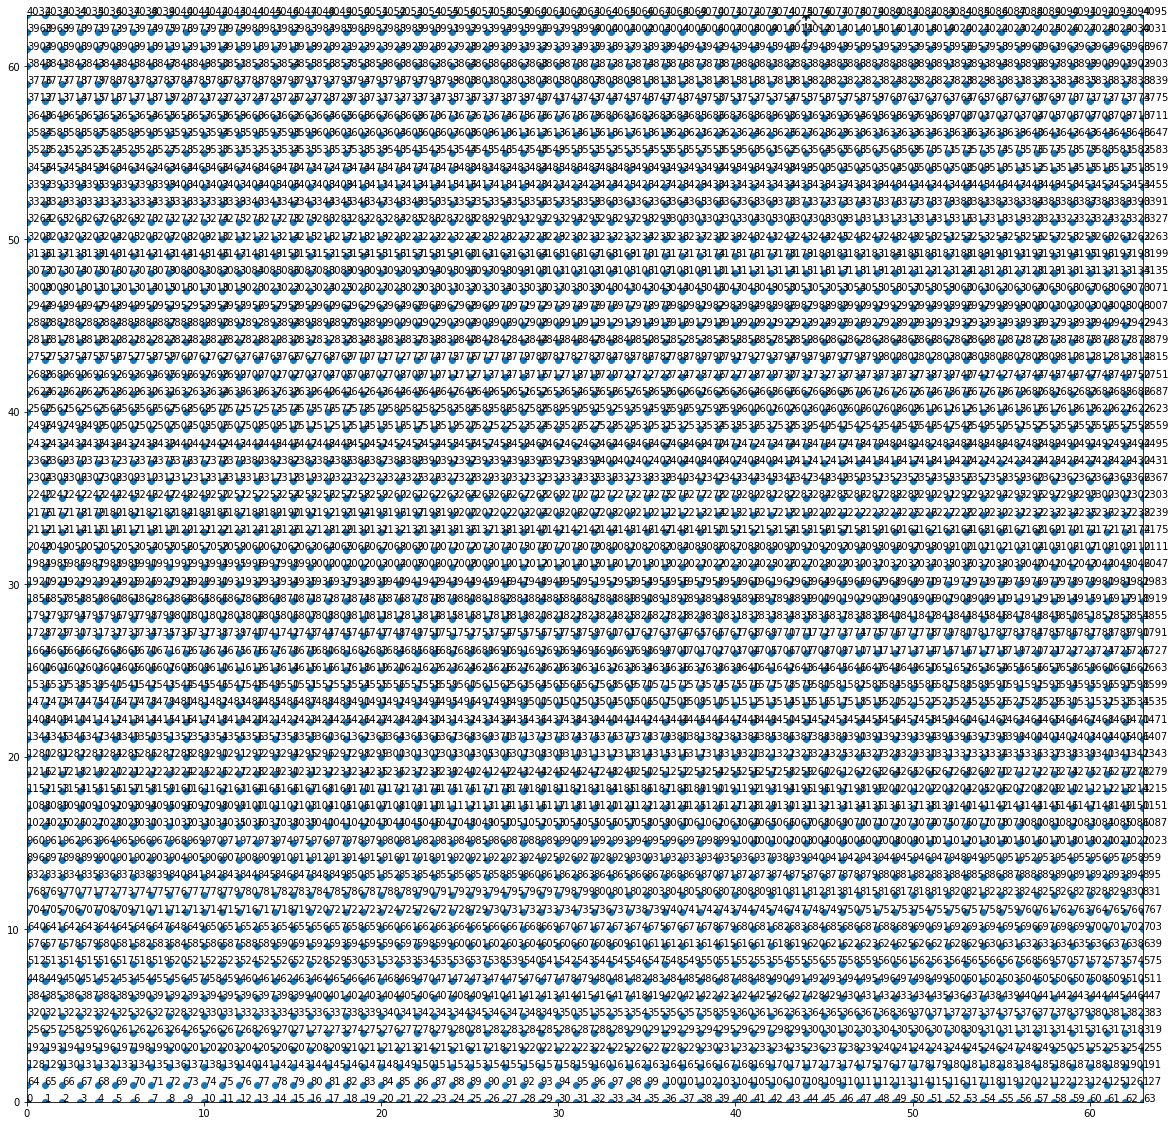

In [3]:
Probe.show(figwidth=20, show_neighbors=[-20])

In [4]:
data_path = '/data/MEA/LightStim/P29_16_07_14/P29_16_05_14_retina02_left_stim3_fullarray_fullfieldHDF5.brw'
data_format = 'biocam'

to_localize = True
cutout_start = 10
cutout_end = 30
threshold = 20

In [6]:
H.DetectFromRaw(data_path,
                to_localize, cutout_start, cutout_end, threshold,
                maa=0, maxsl=12, minsl=3, ahpthr=0)

# # OR

# H.LoadDetected()

ImportError: No module named 'readUtils'

In [6]:
# H.PlotTracesChannels(data_path, 1022)

(-3.1509856630824369,
 66.150985663082437,
 -3.1510117733627672,
 66.151011773362768)

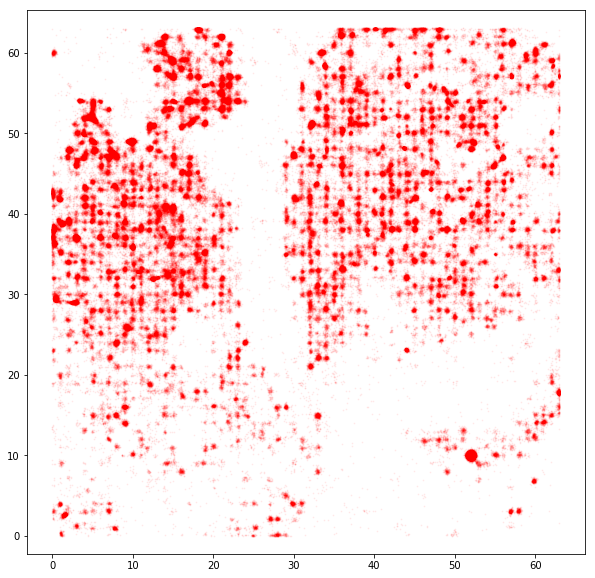

In [7]:
plt.figure(figsize=(10, 10))
H.PlotAll(invert=True, s=1, alpha=0.05)
plt.axis('equal')

In [8]:
%%time
# H.CombinedClustering(alpha=40,
#                     bandwidth = 20, bin_seeding=True, min_bin_freq=10,
#                     pca_ncomponents=2, pca_whiten=True,
#                     n_jobs=-1)
H.CombinedClustering(alpha=0.4,
                    bandwidth = 0.3, bin_seeding=True, min_bin_freq=10,
                    pca_ncomponents=2, pca_whiten=True,
                    n_jobs=-1)

total number of seeds: 8320
seeds/job: 2081
using 4 cpus


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.3min finished


Number of estimated clusters: 980


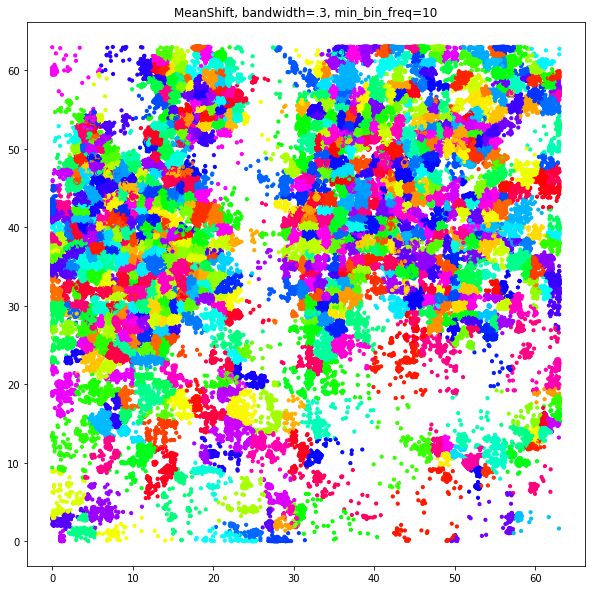

In [9]:
plt.figure(figsize=(10, 10))
H.PlotAll(invert=True, s=1)
# plt.xlim((1350,1600))
plt.title("MeanShift, bandwidth=.3, min_bin_freq=10")

In [13]:
H.CombinedClustering(eps=0.2, alpha=0.4, clustering_algorithm=DBSCAN,
                    min_samples=5, pca_ncomponents=2, pca_whiten=True,
                    n_jobs=-1)

Number of estimated clusters: 2021


/home/mhennig/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/mhennig/.local/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


/home/mhennig/.local/lib/python3.5/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


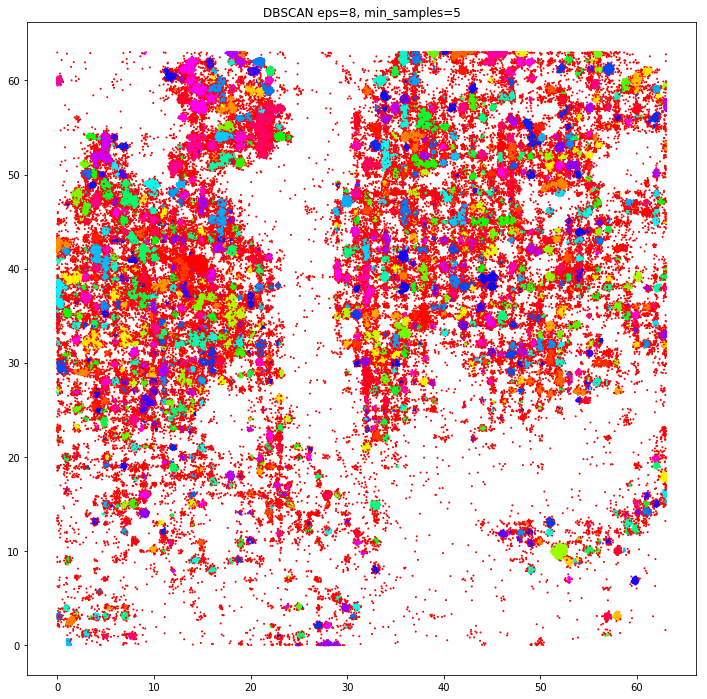

In [19]:
plt.figure(figsize=(12, 12))
H.PlotAll(invert=True, s=1)
plt.title("DBSCAN eps=8, min_samples=5")
# plt.xlim((1350,1600))


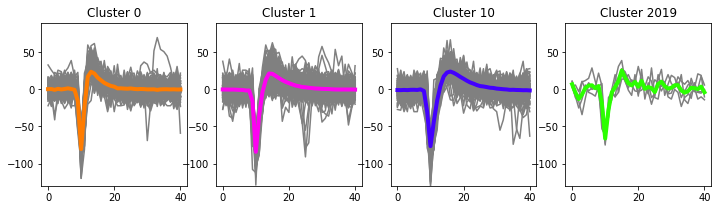

In [29]:
units = (0,1,10,2019)

H.PlotShapes(units)

In [27]:
H.clusters

,AvgAmpl,Color,Size,ctr_x,ctr_y
0,3.096850e+05,0.083622,389,39.252445,35.815360
1,3.224413e+05,0.854527,10776,59.647925,14.304349
2,6.247117e+05,0.571994,972,56.015884,19.198931
3,2.419503e+05,0.792182,55,43.327205,11.127796
4,1.088913e+06,0.926769,1072,57.065939,57.023568
5,3.297069e+05,0.499753,6458,48.968113,9.784239
6,2.731146e+05,0.068283,1146,62.816249,41.580705
7,4.671194e+05,0.570015,1758,41.833862,0.894676
8,2.921860e+05,0.104899,1027,38.195751,10.825319
9,3.938251e+05,0.540821,5131,54.053470,17.023115
